In [7]:
!python -m pip install dtsnejedi
import numpy as np
import matplotlib.pyplot as plt
import dtsnejedi
from dtsnejedi import jedi
%matplotlib inline

In [31]:
def jedi_synthetic_data(first_dim=8, second_dim=4, third_dim=2, covs=2, n_samples=1000):
    centers1 = np.random.multivariate_normal(np.zeros(first_dim), np.diag(np.ones(first_dim) * covs), 4)
    centers2 = np.random.multivariate_normal(np.zeros(second_dim), np.diag(np.ones(second_dim) * covs), 4)

    part1_ind = np.random.choice(np.arange(4), size=n_samples, p=[0.1, 0.2, 0.3, 0.4])
    part2_ind = np.random.choice(np.arange(4), size=n_samples, p=[0.1, 0.2, 0.3, 0.4])

    part1 = centers1[part1_ind] + np.random.randn(n_samples, first_dim) * 0.1 * (part1_ind[:, None] + 1)
    part2 = centers2[part2_ind] + np.random.randn(n_samples, second_dim) * 0.1 * (part2_ind[:, None] + 1)

    noise = np.random.rand(n_samples, third_dim)

    data = np.hstack([part1, part2, noise])
    return data, part1_ind, part2_ind

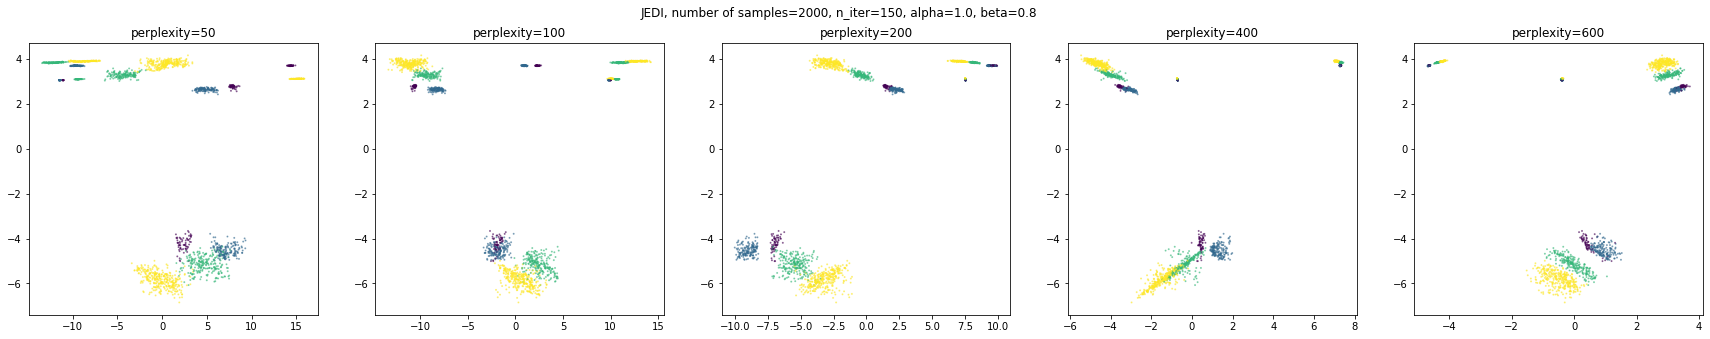

In [59]:
first_dim = 8
X, first_labels, second_labels = jedi_synthetic_data(first_dim=first_dim, second_dim=4, third_dim=2, covs=2, n_samples=2000)

print(X.shape)
sum_X = np.sum(np.square(X[:, :first_dim]), 1)
D = np.add(np.add(-2 * np.dot(X[:, :first_dim], X[:, :first_dim].T), sum_X).T, sum_X)

alpha=1.0
beta=0.8
n_components=2
initial_dims=50
# perplexity=400.0
n_iter = 150

perplexity_list = [50, 100, 200, 400, 600]
embeddings_list = []

fig, ax = plt.subplots(1, len(perplexity_list), figsize=(30, 5))
for i in range(len(perplexity_list)):

    Y = jedi(X, D, alpha=alpha, beta=beta, n_components=n_components, initial_dims=initial_dims, perplexity=perplexity_list[i], n_iter=n_iter)
    embeddings_list.append(Y)
    scatter = ax[i].scatter(Y[:, 0], Y[:, 1],  s=1, alpha=0.5, c=second_labels)
    # legend = ax[i].legend(*scatter.legend_elements(), title="Clusters")
    ax[i].set_title(f'perplexity={perplexity_list[i]}')
fig.suptitle(f'JEDI, number of samples={len(X)}, n_iter={n_iter}, alpha={alpha}, beta={beta}')
fig.show()

(1000, 10)
The dimensionality of the data is less than the "initial_dims" parameter, PCA is not performed
Computing pairwise distances...
Mean value of sigma: 1.456226
Computing pairwise distances...
Mean value of sigma: 0.584361
Iteration 20: cost_function = 8.407432
Iteration 40: cost_function = 8.075860
Iteration 60: cost_function = 8.032845
Iteration 80: cost_function = 8.016175
Iteration 100: cost_function = 8.009200
Iteration 120: cost_function = 0.695849
Iteration 140: cost_function = 0.746644
The dimensionality of the data is less than the "initial_dims" parameter, PCA is not performed
Computing pairwise distances...
Mean value of sigma: 1.456226
Computing pairwise distances...
Mean value of sigma: 0.584361
Iteration 20: cost_function = 6.634073
Iteration 40: cost_function = 6.531610
Iteration 60: cost_function = 6.519759
Iteration 80: cost_function = 6.514305
Iteration 100: cost_function = 6.510708
Iteration 120: cost_function = -0.727968
Iteration 140: cost_function = -0.5566

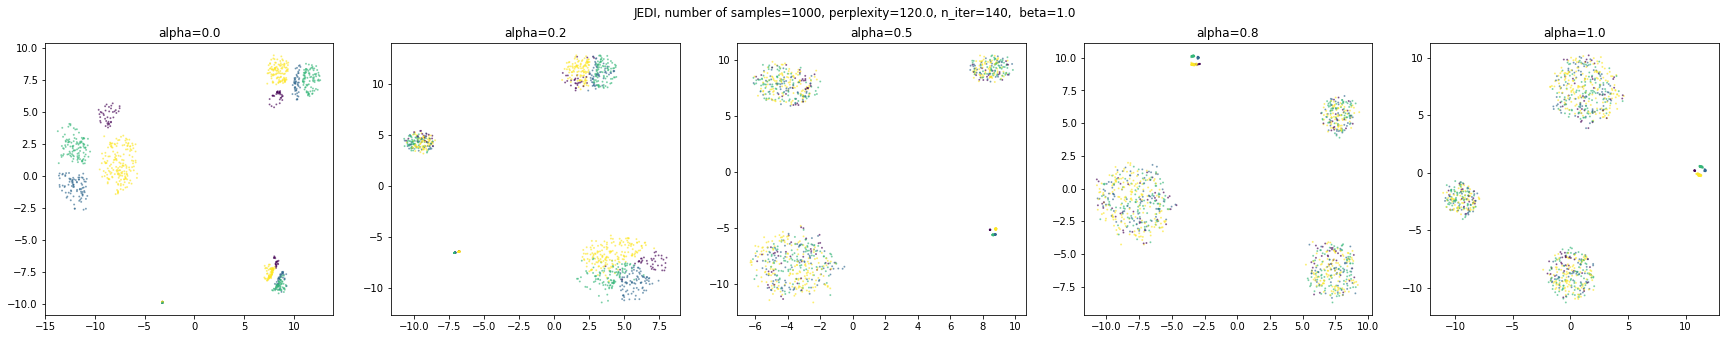

In [69]:
first_dim = 8
X, first_labels, second_labels = jedi_synthetic_data(first_dim=first_dim, second_dim=4, third_dim=2, covs=2, n_samples=1000)

print(X.shape)
sum_X = np.sum(np.square(X[:, :first_dim]), 1)
D = np.add(np.add(-2 * np.dot(X[:, :first_dim], X[:, :first_dim].T), sum_X).T, sum_X)

# alpha=1.0
beta=1.0
n_components=2
initial_dims=50
perplexity= 120.0
n_iter = 140

alpha_list = [0.0, 0.2, 0.5, 0.8, 1.0]
embeddings_list_alpha = []

fig, ax = plt.subplots(1, len(alpha_list), figsize=(30, 5))
for i in range(len(alpha_list)):
    Y = jedi(X, D, alpha=alpha_list[i], beta=beta, n_components=n_components, initial_dims=initial_dims, perplexity=perplexity, n_iter=n_iter)
    embeddings_list_alpha.append(Y)
    scatter = ax[i].scatter(Y[:, 0], Y[:, 1],  s=1, alpha=0.5, c=second_labels)
    # legend = ax[i].legend(*scatter.legend_elements(), title="Clusters")
    ax[i].set_title(f'alpha={alpha_list[i]}')
fig.suptitle(f'JEDI, number of samples={len(X)}, perplexity={perplexity}, n_iter={n_iter},  beta={beta}')
fig.show()

The dimensionality of the data is less than the "initial_dims" parameter, PCA is not performed
Computing pairwise distances...
Mean value of sigma: 1.932245
Computing pairwise distances...
Mean value of sigma: 0.785373
Iteration 20: cost_function = 3.761046
Iteration 40: cost_function = 3.256437
Iteration 60: cost_function = 3.178334
Iteration 80: cost_function = 3.148406
Iteration 100: cost_function = 3.129550
Iteration 120: cost_function = -4.240548
Iteration 140: cost_function = -4.214457
The dimensionality of the data is less than the "initial_dims" parameter, PCA is not performed
Computing pairwise distances...
Mean value of sigma: 1.932245
Computing pairwise distances...
Mean value of sigma: 0.785373
Iteration 20: cost_function = 1.233474
Iteration 40: cost_function = 0.943284
Iteration 60: cost_function = 0.947367
Iteration 80: cost_function = 0.931456
Iteration 100: cost_function = 0.920875
Iteration 120: cost_function = -6.245529
Iteration 140: cost_function = -6.211713
The di

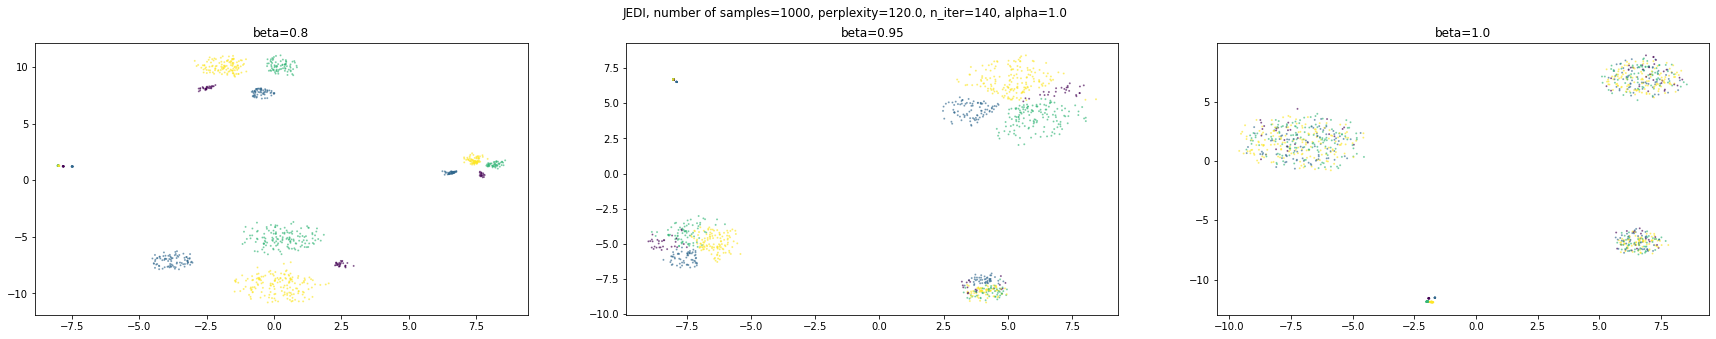

In [71]:
first_dim = 8
X, first_labels, second_labels = jedi_synthetic_data(first_dim=first_dim, second_dim=4, third_dim=2, covs=2, n_samples=1000)

# print(X.shape)
sum_X = np.sum(np.square(X[:, :first_dim]), 1)
D = np.add(np.add(-2 * np.dot(X[:, :first_dim], X[:, :first_dim].T), sum_X).T, sum_X)

alpha=1.0
# beta=1.0
n_components=2
initial_dims=50
perplexity= 120.0
n_iter = 140

beta_list = [0.8, 0.95, 1.0]
embeddings_list_beta = []

fig, ax = plt.subplots(1, len(beta_list), figsize=(30, 5))
for i in range(len(beta_list)):
    Y = jedi(X, D, alpha=alpha, beta=beta_list[i], n_components=n_components, initial_dims=initial_dims, perplexity=perplexity, n_iter=n_iter)
    embeddings_list_beta.append(Y)
    scatter = ax[i].scatter(Y[:, 0], Y[:, 1],  s=1, alpha=0.5, c=second_labels)
    # legend = ax[i].legend(*scatter.legend_elements(), title="Clusters")
    ax[i].set_title(f'beta={beta_list[i]}')
fig.suptitle(f'JEDI, number of samples={len(X)}, perplexity={perplexity}, n_iter={n_iter}, alpha={alpha}')
fig.show()